In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
import cv2 as cv
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

tqdm.pandas()

In [2]:
RAW_PATH = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results'
hdus = [fits.open(f'{RAW_PATH}/{folder}/{folder[:4]}_cdens.fits')[0] for folder in tqdm(os.listdir(RAW_PATH))]
hdus[0].header

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [00:02<00:00, 78.48it/s]


SIMPLE  =                    T / Written by IDL:  Fri Jul 13 16:48:58 2018      
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1440 / length of data axis 1                          
NAXIS2  =                 1440 / length of data axis 2                          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = '10^20 cm^-2'        / Image units                                    
CTYPE1  = 'GLON-TAN'           / name of the coordinate axis                    
CTYPE2  = 'GLAT-TAN'           / name of the coordinate axis                    
CRPIX1  =        762.508789000 / coordinate system reference pixel              
CRPIX2  =        789.038330000 / coordinate system reference pixel              
CRVAL1  =     -0.08947400000

In [ ]:
wcs_whole, shape_whole = find_optimal_celestial_wcs(hdus,projection='CAR')
array_whole, footprint_whole = reproject_and_coadd(hdus,
                                       wcs_whole, shape_out=shape_whole,
                                       reproject_function=reproject_interp)

 47%|██████████████████████████████████████▎                                          | 77/163 [04:03<04:03,  2.83s/it]

In [3]:
df = pd.DataFrame(columns = ['Column Density', 'Latitude', 'Longitude'])
for folder in tqdm(os.listdir(PATH)):
    tilename = folder[:4]
    hdu = fits.open(f'{PATH}/{folder}/{tilename}_cdens.fits')[0]
    wcs = WCS(hdu.header)
    image = hdu.data
    shape = np.shape(image)
    x = np.arange(0, shape[0])
    y = np.arange(0, shape[1])
    xx, yy = np.meshgrid(x, y)
    coords_grid = pixel_to_skycoord(xx,yy, wcs)
    lat = coords_grid.l.degree
    lon = coords_grid.b.degree
    df_i = pd.DataFrame()
    df_i['Column Density'] = image.flatten()*10**20
    df_i['Latitude'] = lat.flatten()
    df_i['Longitude'] = lon.flatten()
    df_i = df_i.dropna()
    df_i = df_i[df_i['Column Density']>0]
    df = df.append(df_i)
df

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [32:01<00:00, 11.79s/it]


,Column Density,Latitude,Longitude
5908,1967245292663574102016.0,0.933078,-1.152479
5909,2031307220458984439808.0,0.931411,-1.152479
5923,2187529945373535109120.0,0.908082,-1.152488
5924,2269893836975097774080.0,0.906415,-1.152488
5925,2339838981628418064384.0,0.904749,-1.152489
...,...,...,...
2040288,1265999507904052854784.0,357.705677,1.191235
2040289,1311845302581787099136.0,357.704010,1.191235
2040290,1393191909790039146496.0,357.702343,1.191234
2040291,1398467922210693316608.0,357.700677,1.191234


In [4]:
hdu.header

In [9]:
N_mins = np.array([3.54, 5.00, 7.07, 10.00, 14.14, 20.00, 28.28])*10**21

In [10]:
hist, bins = np.histogram(df['Column Density'], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

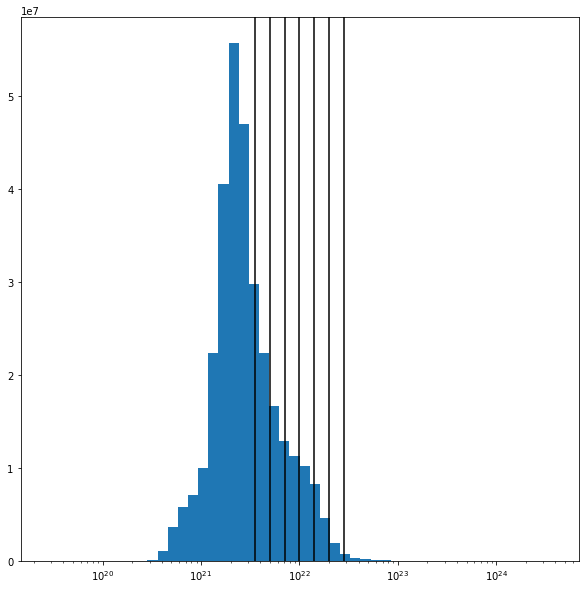

In [11]:
plt.figure(figsize = (10,10))
plt.hist(df['Column Density'], bins=logbins)
plt.xscale('log')
for N_min in N_mins:
    plt.axvline(N_min, c='k')
plt.show()

In [12]:
PATH = 'D:/Workshop/PhD/Data/ViaLactea/Temperature Analysis/Whole Plane Analysis'
for N_min in tqdm(N_mins):
    df_i = df[df['Column Density']>N_min]
    df_i = df_i[['Latitude','Longitude']]
    df_i.to_csv(f'{PATH}/{int(N_min/10**21)}.csv', index = False)

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [29:35<00:00, 253.64s/it]


In [13]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Fri Jul 13 17:08:16 2018      
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1440 / length of data axis 1                          
NAXIS2  =                 1440 / length of data axis 2                          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = '10^20 cm^-2'        / Image units                                    
CTYPE1  = 'GLON-TAN'           / name of the coordinate axis                    
CTYPE2  = 'GLAT-TAN'           / name of the coordinate axis                    
CRPIX1  =        723.000000000 / coordinate system reference pixel              
CRPIX2  =        723.000000000 / coordinate system reference pixel              
CRVAL1  =       -1.417539000